In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

In [65]:
# Generate random sample data in a 5 by 3 matrix
np.random.seed(42)
features = ['F1', 'F2', 'F3']
labels = ['Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5']
X = np.random.random_sample([5, 3]) * 10
df = pd.DataFrame(X, columns=features, index=labels)
print(df)

               F1        F2        F3
Label 1  3.745401  9.507143  7.319939
Label 2  5.986585  1.560186  1.559945
Label 3  0.580836  8.661761  6.011150
Label 4  7.080726  0.205845  9.699099
Label 5  8.324426  2.123391  1.818250


In [66]:
# Compute the distance matrix of all samples
dist_matrix = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)
print(dist_matrix)

           Label 1    Label 2    Label 3    Label 4    Label 5
Label 1   0.000000  10.067500   3.527332  10.163608  10.283767
Label 2  10.067500   0.000000   9.973350   8.323293   2.418558
Label 3   3.527332   9.973350   0.000000  11.285037  10.967857
Label 4  10.163608   8.323293  11.285037   0.000000   8.205581
Label 5  10.283767   2.418558  10.967857   8.205581   0.000000


In [67]:
# Apply the complete linkage agglomeration to the clusters
row_clusters = linkage(df.values, method='complete', metric='euclidean')
columns = ['Row Label 1', 'Row Label 2', 'Distance', 'Cluster Size']
rows = ['Cluster ' + str(i + 1) for i in range(4)]
rc_table = pd.DataFrame(row_clusters, columns=columns, index=rows)
print(rc_table)

           Row Label 1  Row Label 2   Distance  Cluster Size
Cluster 1          1.0          4.0   2.418558           2.0
Cluster 2          0.0          2.0   3.527332           2.0
Cluster 3          3.0          5.0   8.323293           3.0
Cluster 4          6.0          7.0  11.285037           5.0


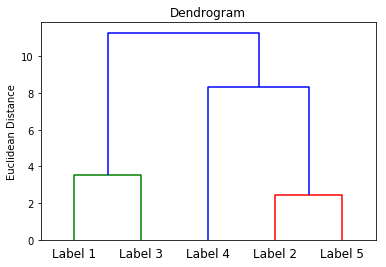

In [68]:
# Visualize dendrogram of the hierarchical tree clustering
row_dendro = dendrogram(row_clusters, labels=labels)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')
plt.show()